### 결정 트리
- pip install graphviz

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data,iris.target,stratify=iris.target,test_size=0.2,random_state=11
)

In [3]:
dtc = DecisionTreeClassifier(random_state=156)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(
    dtc,'data/tree.dot',
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    impurity=True, filled=True
)

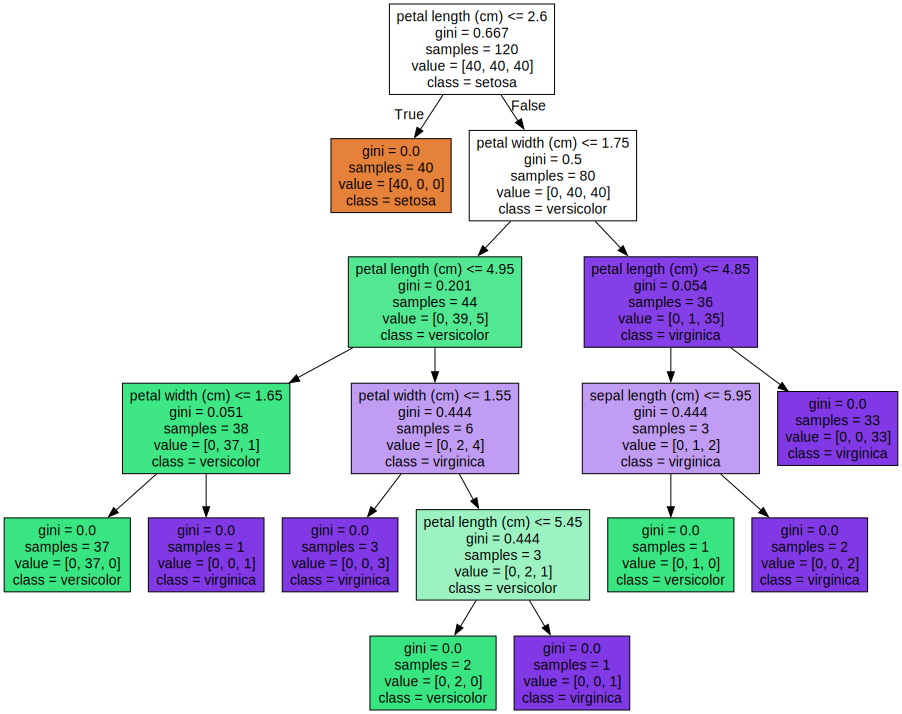

In [5]:
import graphviz
with open('data/tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

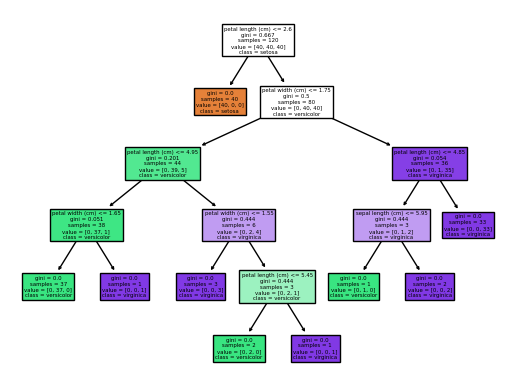

In [7]:
plot_tree(dtc,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
plt.show()

In [9]:
# max_depth 3으로
dtc2= DecisionTreeClassifier(max_depth=3,random_state=2023)
dtc2.fit(X_train,y_train)
export_graphviz(dtc2,'data/tree2.dot',feature_names=iris.feature_names,class_names=iris.target_names,filled=True)

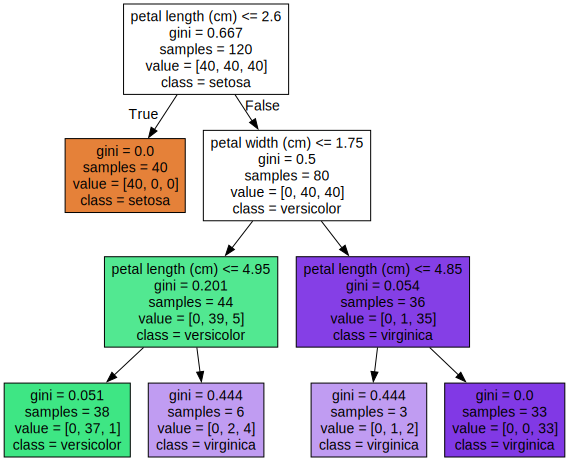

In [10]:
with open('data/tree2.dot') as f:
    dot2 = f.read()
graphviz.Source(dot2)

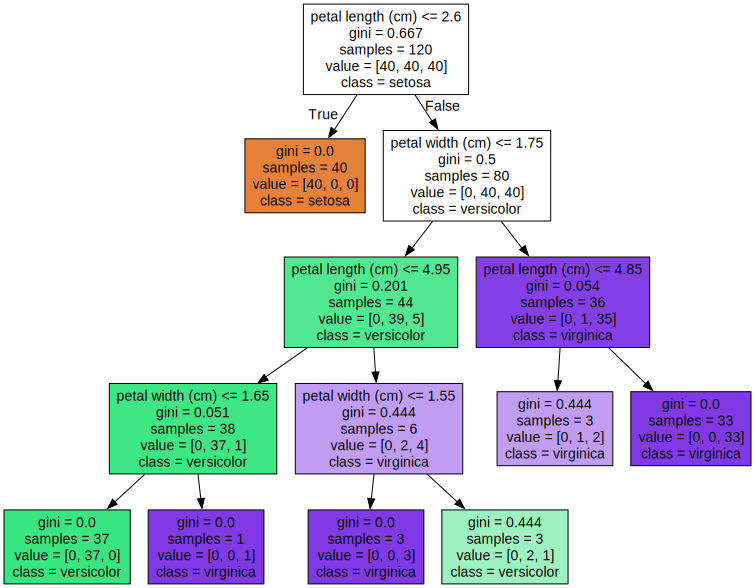

In [11]:
# 제약조건 : min_samples_split=4
dtc3= DecisionTreeClassifier(min_samples_split=4,random_state=2023)
dtc3.fit(X_train,y_train)
export_graphviz(dtc3,'data/tree3.dot',feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
with open('data/tree3.dot') as f:
    dot3 = f.read()
graphviz.Source(dot3)

In [14]:
# 모델 비교
dtc.score(X_test,y_test), dtc2.score(X_test,y_test), dtc3.score(X_test,y_test)

(1.0, 1.0, 1.0)

- 모델이 제공하는 정보: Feature importance

In [15]:
dtc.feature_importances_

array([0.01666667, 0.        , 0.57742557, 0.40590776])

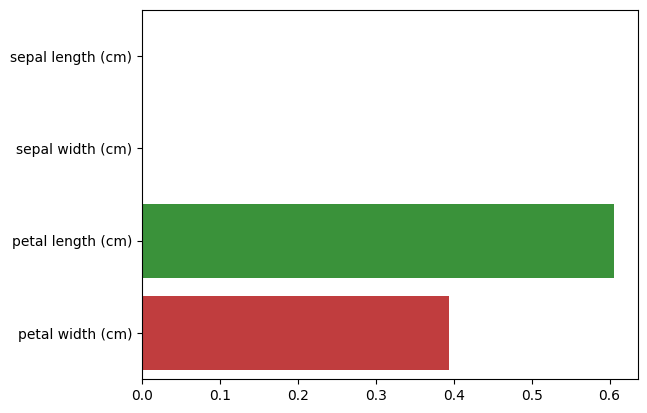

In [19]:
import seaborn as sns
sns.barplot(x=dtc2.feature_importances_,y=iris.feature_names)
plt.show()